In [47]:
import pandas as pd
import seaborn as sns
import csv
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('./csv/letter.csv')
letter = data[['class', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']]

# Preview of Data
- There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
- There are no null values, so we don't have to worry about that.
- There are 50 observations of each species (setosa, versicolor, virginica).

In [48]:
letter.head()

,class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,Z,2,4,4,3,2,7,8,2,9,11,7,7,1,8,5,6
1,P,4,7,5,5,5,5,9,6,4,8,7,9,2,9,7,10
2,S,7,10,8,7,4,8,8,5,10,11,2,8,2,5,5,10
3,H,4,9,5,7,4,7,7,13,1,7,6,8,3,8,0,8
4,H,6,7,8,5,4,7,6,3,7,10,7,9,3,8,3,7


In [49]:
letter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   20000 non-null  object
 1   x-box   20000 non-null  int64 
 2   y-box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   high    20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x-bar   20000 non-null  int64 
 7   y-bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybr   20000 non-null  int64 
 12  xy2br   20000 non-null  int64 
 13  x-ege   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y-ege   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [50]:
letter.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [51]:
# percentage of each class
letter['class'].value_counts(normalize=True)

class_percentage = {}
for i in letter['class'].value_counts().index:
    class_percentage[i] = letter['class'].value_counts(normalize=True)[i], (150 * letter['class'].value_counts(normalize=True)[i]).round(0)
class_percentage


{'U': (0.04065, 6.0),
 'D': (0.04025, 6.0),
 'P': (0.04015, 6.0),
 'T': (0.0398, 6.0),
 'M': (0.0396, 6.0),
 'A': (0.03945, 6.0),
 'X': (0.03935, 6.0),
 'Y': (0.0393, 6.0),
 'N': (0.03915, 6.0),
 'Q': (0.03915, 6.0),
 'F': (0.03875, 6.0),
 'G': (0.03865, 6.0),
 'E': (0.0384, 6.0),
 'B': (0.0383, 6.0),
 'V': (0.0382, 6.0),
 'L': (0.03805, 6.0),
 'R': (0.0379, 6.0),
 'I': (0.03775, 6.0),
 'O': (0.03765, 6.0),
 'W': (0.0376, 6.0),
 'S': (0.0374, 6.0),
 'J': (0.03735, 6.0),
 'K': (0.03695, 6.0),
 'C': (0.0368, 6.0),
 'H': (0.0367, 6.0),
 'Z': (0.0367, 6.0)}

# Data Visualization
- After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
- There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).


In [52]:
# g = sns.pairplot(data, hue='class', markers='+')
# plt.show()

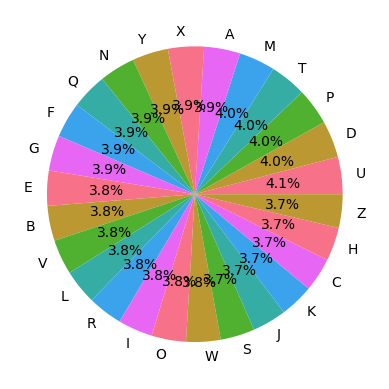

In [53]:
fig, ax = plt.subplots()
ax.pie(letter['class'].value_counts(normalize=True), labels=letter['class'].value_counts().index, autopct='%1.1f%%')
plt.show()

## Data reduction

### Reduction of the number of elements

In [54]:
final_letter_count = dict.fromkeys(letter['class'].unique(), 0)

lowest_percentage = sorted(class_percentage.items(), key=lambda x: x[1][0])[:6]

for lett in lowest_percentage:
    letter_to_remove = lett[0]
    final_letter_count[letter_to_remove] += 1


with open('./csv/final_letter.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(letter.columns)
    for index, row in letter.iterrows():
        if final_letter_count[row['class']] < class_percentage[row['class']][1]:
            writer.writerow(row)
            final_letter_count[row['class']] += 1

In [55]:
final_data = pd.read_csv('./csv/final_letter.csv')

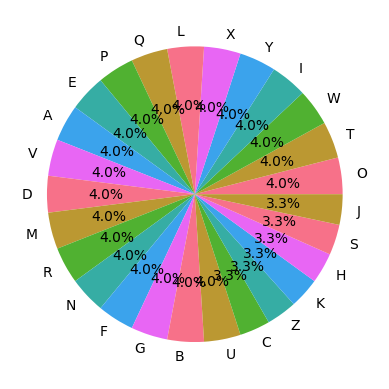

In [56]:
fig, ax = plt.subplots()
ax.pie(final_data['class'].value_counts(normalize=True), labels=final_data['class'].value_counts().index, autopct='%1.1f%%')
plt.show()

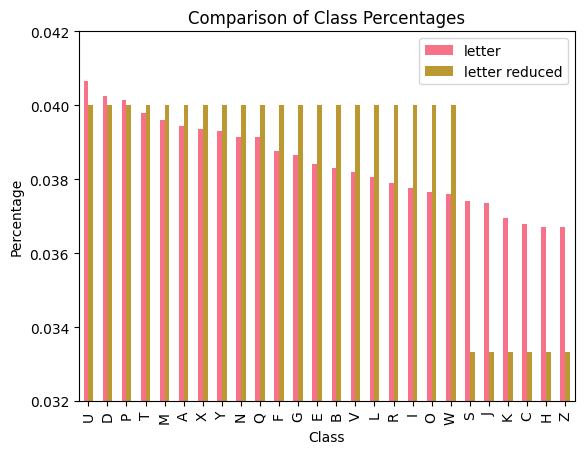

In [57]:
data_percentage = letter['class'].value_counts(normalize=True)
final_data_percentage = final_data['class'].value_counts(normalize=True)

percentage_comparison = pd.concat([data_percentage, final_data_percentage], axis=1)
percentage_comparison.columns = ['letter', 'letter reduced']

ax = percentage_comparison.plot(kind='bar')
ax.set_ylim([0.032, 0.042])
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Comparison of Class Percentages')
plt.show()

### Reduction of the number of features

In [61]:
reduced_data = final_data[['class', 'x-box', 'y-box', 'width', 'high', 'onpix']]
reduced_data.head()

reduced_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   150 non-null    object
 1   x-box   150 non-null    int64 
 2   y-box   150 non-null    int64 
 3   width   150 non-null    int64 
 4   high    150 non-null    int64 
 5   onpix   150 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 7.2+ KB


# Modeling with scikit-learn

In [59]:
X = data.drop(['Id', 'Species'], axis=1)
y = data['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

KeyError: "['Id', 'Species'] not found in axis"

## Train and test on the same dataset
- This method is not suggested since the end goal is to predict iris species using a dataset the model has not seen before.
- There is also a risk of overfitting the training data.

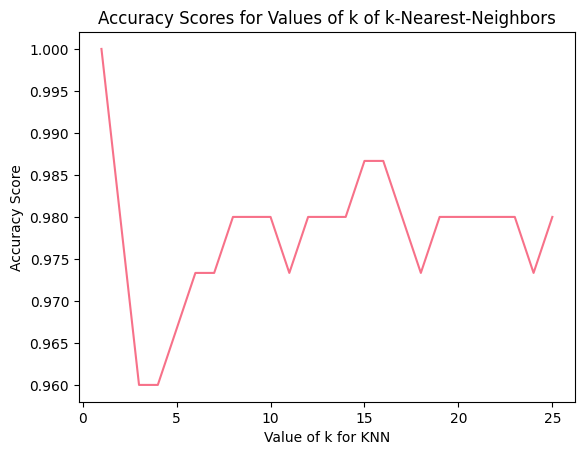

In [ ]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


## Split the dataset into a training set and a testing set

### Advantages
- By splitting the dataset pseudo-randomly into a two separate sets, we can train using one set and test using another.
- This ensures that we won't use the same observations in both sets.
- More flexible and faster than creating a model using all of the dataset for training.

### Disadvantages
- The accuracy scores for the testing set can vary depending on what observations are in the set. 
- This disadvantage can be countered using k-fold cross-validation.

### Notes
- The accuracy score of the models depends on the observations in the testing set, which is determined by the seed of the pseudo-random number generator (random_state parameter).
- As a model's complexity increases, the training accuracy (accuracy you get when you train and test the model on the same data) increases.
- If a model is too complex or not complex enough, the testing accuracy is lower.
- For KNN models, the value of k determines the level of complexity. A lower value of k means that the model is more complex.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


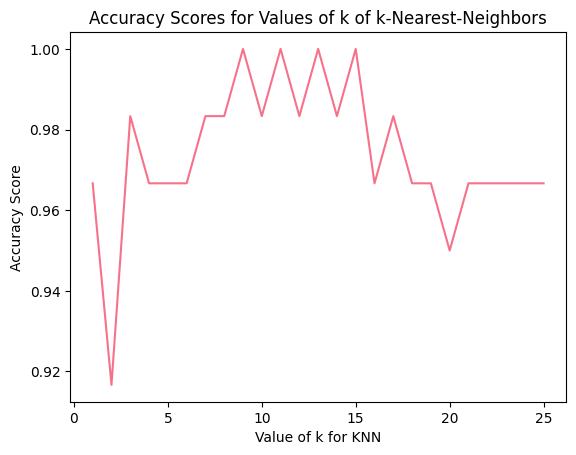

In [ ]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


## Choosing KNN to Model Iris Species Prediction with k = 12
After seeing that a value of k = 12 is a pretty good number of neighbors for this model, I used it to fit the model for the entire dataset instead of just the training set.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2]])

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)